<a href="https://colab.research.google.com/github/ydicsey/image-processing/blob/main/dithering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENV setup

In [ ]:
#import the library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
img_path = 'input.jpg'
img = cv.imread(img_path)
img.shape

(885, 1180, 3)

grayscale

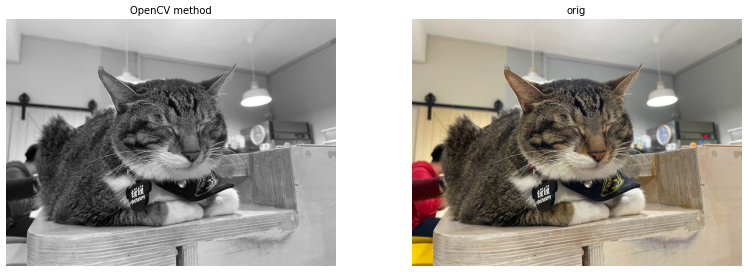

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

f = plt.figure(num=None, figsize=(16, 12), dpi=60)
ax1 = f.add_subplot(2,2, 1)
plt.axis('off')
plt.imshow(gray, cmap="gray")
ax1.title.set_text('OpenCV method')

ax2 = f.add_subplot(2,2, 2)
plt.axis('off')
plt.imshow(img)
ax2.title.set_text('orig')

plt.show()

avoid overflow

In [ ]:
gray = gray.astype(int)
gray

array([[219, 219, 218, ..., 183, 183, 183],
       [219, 219, 218, ..., 183, 183, 183],
       [219, 218, 218, ..., 183, 183, 183],
       ...,
       [120, 120, 120, ..., 172, 173, 174],
       [120, 120, 120, ..., 172, 171, 170],
       [120, 120, 120, ..., 171, 171, 171]])

In [ ]:
def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

find shape

In [ ]:
gray.shape

(885, 1180)

## problem A

In [ ]:
d2 = np.array([ [  0, 128,  32, 160,],  
                [192,  64, 224,  95,], 
                [ 48, 176,  16, 144,],  
                [240, 112, 208,  80 ] ])

In [ ]:
orig_x, orig_y = gray.shape

In [ ]:
new_x = ((orig_x // 4)+1) *4
new_y = ((orig_y // 4)+1) *4

In [ ]:
image_to_dither = np.zeros([new_x, new_y], dtype='uint8')
image_to_dither[0:orig_x, 0:orig_y] = gray
image_to_dither

array([[219, 219, 218, ...,   0,   0,   0],
       [219, 219, 218, ...,   0,   0,   0],
       [219, 218, 218, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
dither_table = np.tile(d2, (((orig_x // 4)+1), ((orig_y // 4))+1))
dither_table.shape

(888, 1184)

In [ ]:
dither_image = (image_to_dither > dither_table )*255

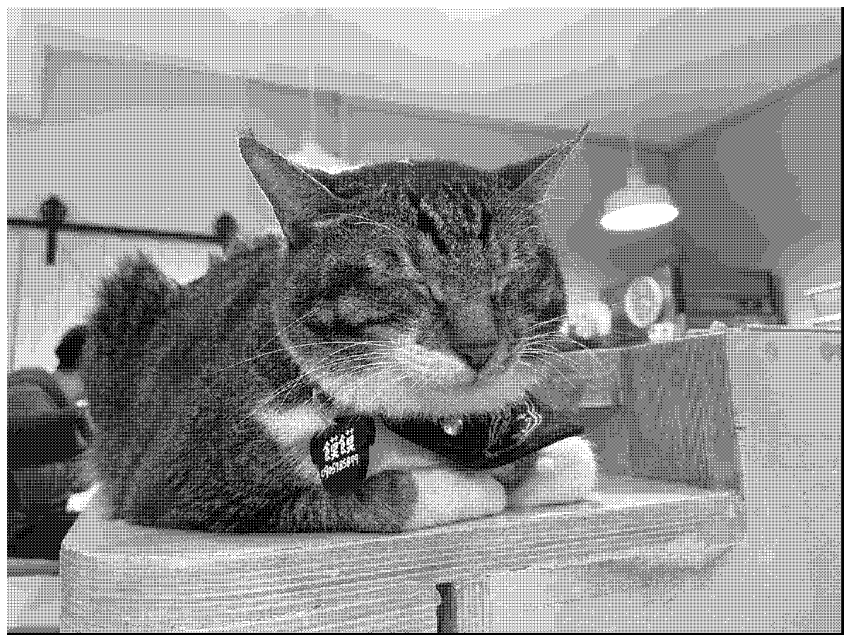

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.axis('off')
plt.imshow(dither_image, cmap="gray")
plt.show()

## problem B

In [ ]:
d1 = np.array([ [ 0, 56], 
                [84, 28] ])

In [ ]:
orig_x, orig_y = gray.shape

In [ ]:
new_x = ((orig_x // 2)+1) *2
new_y = ((orig_y // 2)+1) *2

In [ ]:
Qij = np.zeros([new_x, new_y], dtype='uint8')
Qij[0:orig_x, 0:orig_y] = gray//85
Qij.shape

(886, 1182)

In [ ]:
dither_table = np.tile(d1, (((orig_x // 2)+1), ((orig_y // 2))+1))
dither_table.shape

(886, 1182)

In [ ]:
image_to_dither[0:new_x, 0:new_y]

array([[219, 219, 218, ..., 183,   0,   0],
       [219, 219, 218, ..., 183,   0,   0],
       [219, 218, 218, ..., 183,   0,   0],
       ...,
       [120, 120, 120, ..., 170,   0,   0],
       [120, 120, 120, ..., 171,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
dither_image_4_gray_val = ((image_to_dither[0:new_x, 0:new_y] - Qij*85 ) > dither_table) + Qij
dither_image_4_gray_val*=85

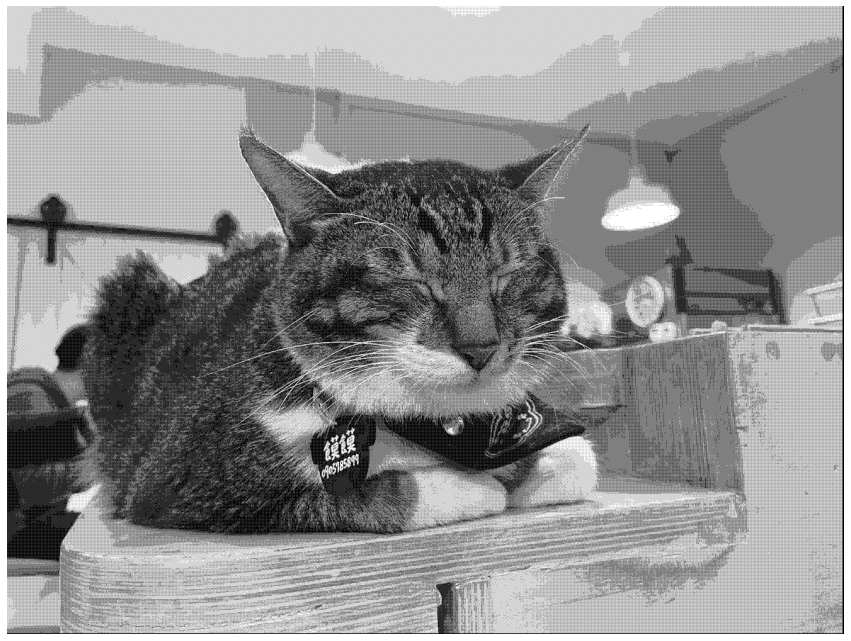

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.axis('off')
plt.imshow(dither_image_4_gray_val, cmap="gray")
plt.show()

compare

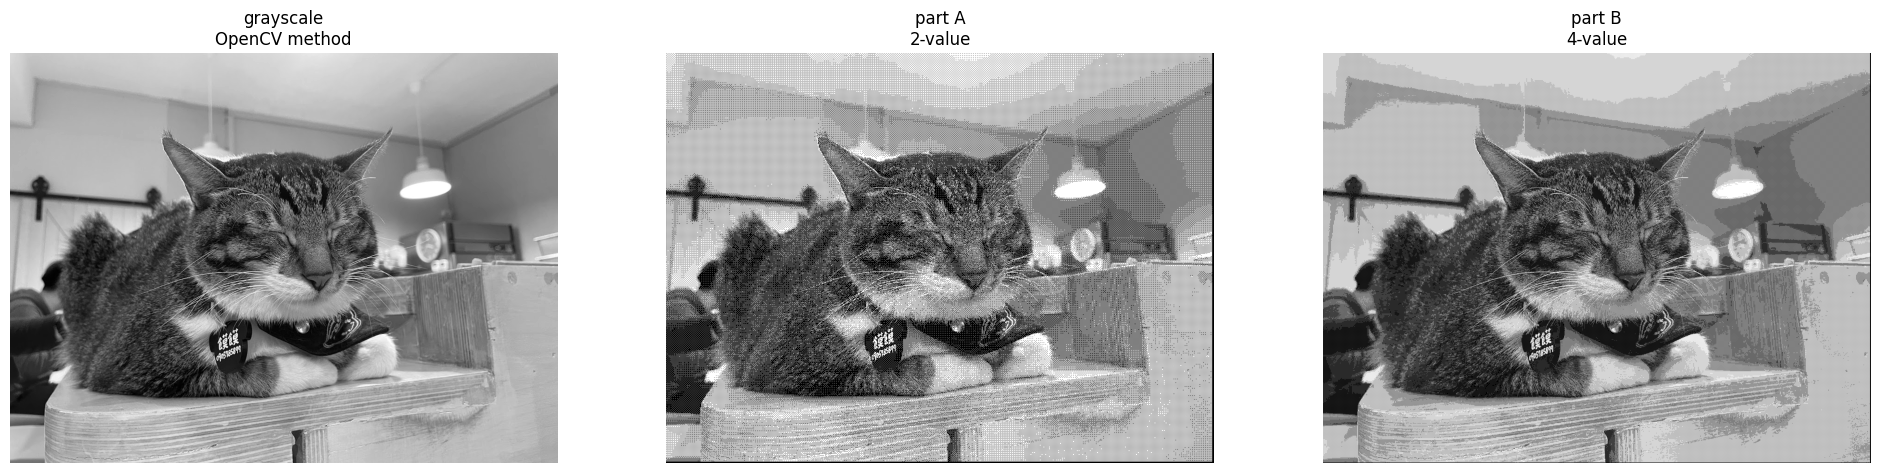

In [ ]:
f = plt.figure(num=None, figsize=(24, 12), dpi=100)
ax1 = f.add_subplot(1,3, 1)
plt.axis('off')
plt.imshow(gray, cmap="gray")
ax1.title.set_text('grayscale\nOpenCV method')

ax2 = f.add_subplot(1,3, 2)
plt.axis('off')
plt.imshow(dither_image, cmap="gray")
ax2.title.set_text('part A\n2-value')

ax2 = f.add_subplot(1,3, 3)
plt.axis('off')
plt.imshow(dither_image_4_gray_val, cmap="gray")
ax2.title.set_text('part B\n4-value')

plt.show()

In [ ]:
path = "partA.jpg"
cv.imwrite(path, dither_image)

True

In [ ]:
path = "partB.jpg"
cv.imwrite(path, dither_image_4_gray_val*85)

True